In [2]:
import pandas as pd

corona = pd.read_csv('data.csv')

corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     61900 non-null  object 
 1   day                                                         61900 non-null  int64  
 2   month                                                       61900 non-null  int64  
 3   year                                                        61900 non-null  int64  
 4   cases                                                       61900 non-null  int64  
 5   deaths                                                      61900 non-null  int64  
 6   countriesAndTerritories                                     61900 non-null  object 
 7   geoId                                                       61625 non-null  object 
 

In [3]:
corona.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [4]:
corona.drop(['dateRep', 'geoId', 'countryterritoryCode', 'continentExp',
             'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'], axis=1, inplace=True)
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day                      61900 non-null  int64  
 1   month                    61900 non-null  int64  
 2   year                     61900 non-null  int64  
 3   cases                    61900 non-null  int64  
 4   deaths                   61900 non-null  int64  
 5   countriesAndTerritories  61900 non-null  object 
 6   popData2019              61777 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 3.3+ MB


In [5]:
corona.isnull().sum()

day                          0
month                        0
year                         0
cases                        0
deaths                       0
countriesAndTerritories      0
popData2019                123
dtype: int64

In [6]:
corona['popData2019'].fillna(0, inplace=True)

In [7]:
corona.isna().any()

day                        False
month                      False
year                       False
cases                      False
deaths                     False
countriesAndTerritories    False
popData2019                False
dtype: bool

In [8]:
corona.isnull().sum()

day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
popData2019                0
dtype: int64

In [9]:
corona['popData2019'] = (corona['popData2019']/float(1000000)).round(2)
corona.sample(2)

,day,month,year,cases,deaths,countriesAndTerritories,popData2019
15580,13,12,2020,3552,8,Denmark,5.81
14700,18,11,2020,228,0,Cyprus,0.88


In [10]:
corona.head(5)

,day,month,year,cases,deaths,countriesAndTerritories,popData2019
0,14,12,2020,746,6,Afghanistan,38.04
1,13,12,2020,298,9,Afghanistan,38.04
2,12,12,2020,113,11,Afghanistan,38.04
3,11,12,2020,63,10,Afghanistan,38.04
4,10,12,2020,202,16,Afghanistan,38.04


In [11]:
corona.rename({'popData2019':'Population', 'countriesAndTerritories':'Countries'}, axis=1, inplace=True)
corona.sample(2)

,day,month,year,cases,deaths,Countries,Population
56794,10,8,2020,19,0,Tunisia,11.69
35604,22,10,2020,45,0,Maldives,0.53


In [12]:
corona.describe()

,day,month,year,cases,deaths,Population
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000
mean,15.628934,7.067157,2019.998918,1155.147237,26.055460,40.906025
std,8.841582,2.954776,0.032882,6779.224479,131.227055,152.988066
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,0.000000
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.290000
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.170000
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,28.520000
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1433.780000


In [13]:
corona[corona['deaths']==4928]

,day,month,year,cases,deaths,Countries,Population
59243,16,4,2020,30148,4928,United_States_of_America,329.06


In [44]:
corona[corona['cases']==234633]

,day,month,year,cases,deaths,Countries,Population
59003,12,12,2020,234633,3343,United_States_of_America,329.06


In [14]:
corona[corona['cases'].lt(0)]

,day,month,year,cases,deaths,Countries,Population
6311,20,5,2020,-209,0,Benin,11.80
10935,10,3,2020,-9,1,Cases_on_an_international_conveyance_Japan,0.00
16906,7,9,2020,-8261,3800,Ecuador,17.37
17024,12,5,2020,-50,18,Ecuador,17.37
17027,9,5,2020,-1480,50,Ecuador,17.37
17029,7,5,2020,-2461,49,Ecuador,17.37
20558,3,6,2020,-766,107,France,67.01
29276,20,6,2020,-148,47,Italy,60.36
30170,11,9,2020,-6,0,Jersey,0.11
30491,22,7,2020,-110,0,Jordan,10.10


In [15]:
corona.loc[corona['cases'] < 0, 'cases'] = corona.loc[corona['cases'] < 0, 'cases'] * -1
corona.loc[corona['deaths'] < 0, 'deaths'] = corona.loc[corona['deaths'] < 0, 'deaths'] * -1                                                                                                

In [16]:
corona[corona['cases'].lt(0)]

,day,month,year,cases,deaths,Countries,Population


In [17]:
corona.describe()

,day,month,year,cases,deaths,Population
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000
mean,15.628934,7.067157,2019.998918,1155.675864,26.133489,40.906025
std,8.841582,2.954776,0.032882,6779.134381,131.211538,152.988066
min,1.000000,1.000000,2019.000000,0.000000,0.000000,0.000000
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.290000
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.170000
75%,23.000000,10.000000,2020.000000,274.000000,4.000000,28.520000
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1433.780000


In [25]:
corona.sort_values(by = ['year', 'month', 'day'], ascending = [True, True, True], inplace=True, ignore_index=True)

dmin = corona.loc[0].day
mmin = corona.loc[0].month
ymin = corona.loc[0].year

dmax = corona.loc[corona.shape[0]-1].day
mmax = corona.loc[corona.shape[0]-1].month
ymax = corona.loc[corona.shape[0]-1].year

from datetime import date

d1 = date(ymax, mmax, dmax)
d2 = date(ymin, mmin, dmin)

corona_days = (d1-d2).days

print('days = ', corona_days)

corona_global_deaths_avg = corona['deaths'].sum() / corona_days

corona_global_cases_avg = corona['cases'].sum() / corona_days

print('corona_global_deaths_avg = {:.0f}'.format(corona_global_deaths_avg))
print('corona_global_cases_avg = {:.0f}'.format(corona_global_cases_avg))

days =  349
corona_global_deaths_avg = 4635
corona_global_cases_avg = 204975


<BarContainer object of 2 artists>

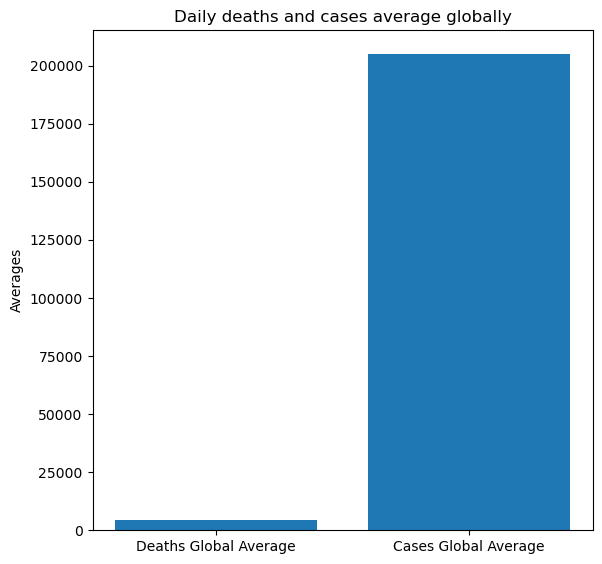

In [27]:
import matplotlib.pyplot as plt

x = ['Deaths Global Average', 'Cases Global Average']
y = [corona_global_deaths_avg, corona_global_cases_avg]

fig = plt.figure(figsize=(5,5))

ax = fig.add_axes([-1, -1, 1, 1])

ax.set_ylabel('Averages')
ax.set_title('Daily deaths and cases average globally')

ax.bar(x,y)

In [28]:
avg_by_country = corona.groupby('Countries')[['deaths', 'cases']].agg([sum]).sort_values(by=('deaths', 'sum'), ascending=False)

avg_by_country = avg_by_country / corona_days
avg_by_country

,deaths,cases
,sum,sum
Countries,,
United_States_of_America,857.240688,46580.957020
Brazil,519.776504,19776.366762
India,410.759312,28321.203438
Mexico,326.512894,3581.787966
Italy,185.048711,5283.690544
...,...,...
Cambodia,0.000000,1.028653
Seychelles,0.000000,0.535817


<Axes: xlabel='Countries'>

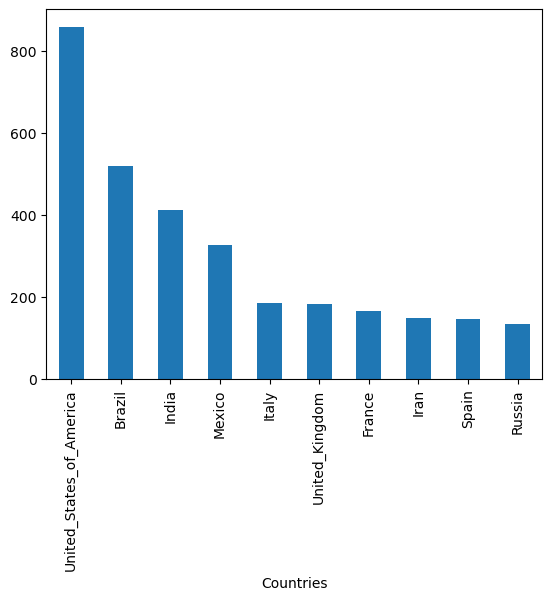

In [35]:
avg_by_country['deaths']['sum'].head(10).plot(kind='bar')

<Axes: xlabel='Countries'>

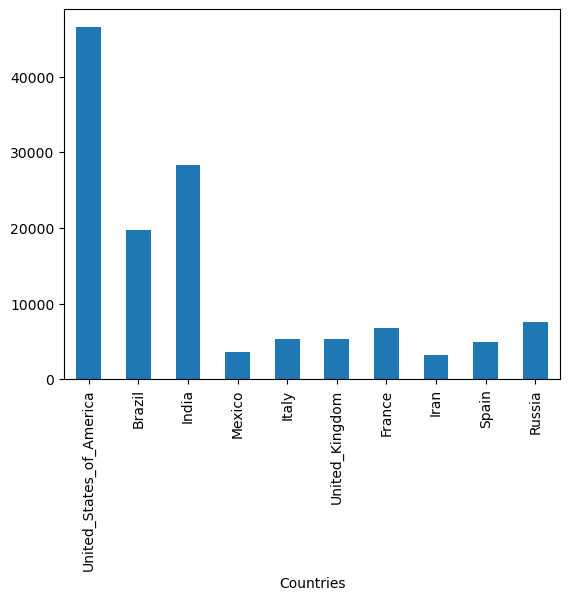

In [36]:
avg_by_country['cases']['sum'].head(10).plot(kind='bar')

In [38]:
sum_by_month = corona[corona['year'] == 2020].groupby('month')[['deaths', 'cases']].sum().sort_values(by='month')
sum_by_month

,deaths,cases
month,,
1,213,9799
2,2708,75422
3,35814,723756
4,189180,2341230
5,143978,2901710
6,134131,4251355
7,166203,7067744
8,179532,7966606
9,162169,8472782


In [49]:
print(sum_by_month)

       deaths     cases
month                  
1         213      9799
2        2708     75422
3       35814    723756
4      189180   2341230
5      143978   2901710
6      134131   4251355
7      166203   7067744
8      179532   7966606
9      162169   8472782
10     181064  11949041
11     271086  17134026
12     151585   8642838


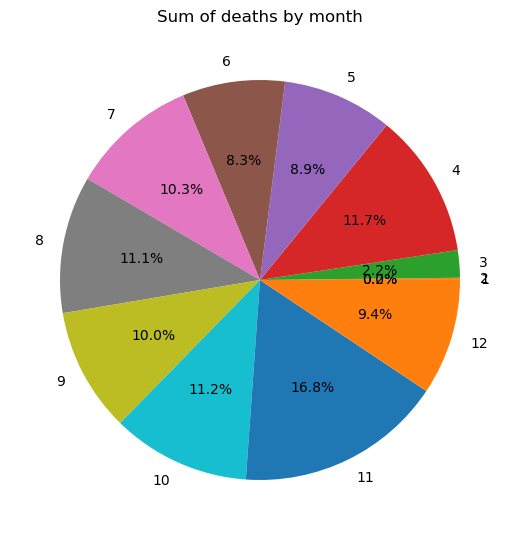

In [58]:
x = sum_by_month.index.tolist()

y = sum_by_month['deaths']

fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([.1, .1, 1, 1])

ax.set_title('Sum of deaths by month')
ax.pie(y, labels=x, autopct='%.1f%%')

plt.show()

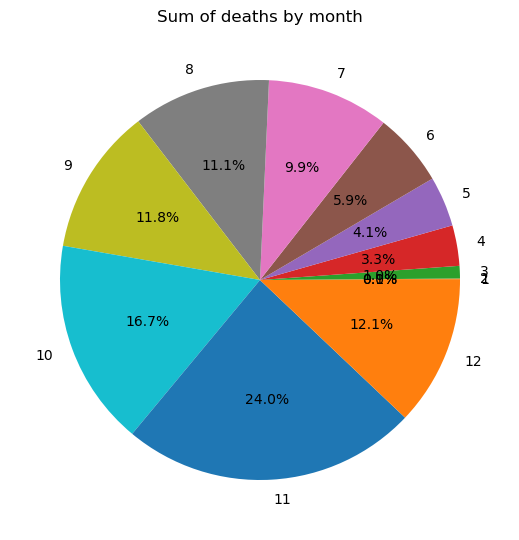

In [59]:
x = sum_by_month.index.tolist()

y = sum_by_month['cases']

fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([.1, .1, 1, 1])

ax.set_title('Sum of deaths by month')
ax.pie(y, labels=x, autopct='%.1f%%')

plt.show()

In [61]:
sum_by_month_country = corona.groupby(['Countries', 'month'])[['deaths', 'cases']].agg([sum]).sort_index()
sum_by_month_country

deaths  cases
                     sum    sum
Countries   month              
Afghanistan 1          0      0
            2          0      1
            3          4    140
            4         56   1808
            5        189  12576
...                  ...    ...
Zimbabwe    8        143   3320
            9         32   1425
            10        14    525
            11        34   1588
            12        31   1296

[2221 rows x 2 columns]

In [62]:
sum_by_month_country.loc[['China', 'Italy', 'Spain', 'Egypt']]

deaths   cases
                   sum     sum
Countries month               
China     1        213    9687
          2       2624   69641
          3        472    2886
          4       1328    1703
          5          1     184
          6          3     652
          7         18    2709
          8         63    2406
          9         17     633
          10         0     771
          11         0     515
          12         0     234
Italy     1          0       3
          2         21     885
          3      11570  100851
          4      16091  101852
          5       5658   29073
          6       1466    8068
          7        388    6722
          8        345   21060
          9        398   44793
          10      2446  334663
          11     16583  937504
          12      9616  258534
Spain     1          0       0
          2          0      54
          3       7340  104213
          4      17203  112342
          5       6420   24990
          6       1228    9842
          7         90   39251
          8        653  174336
          9       2697  306330
          10      4087  416490
          11      9191  462509
          12      2555   82388
Egypt     1          0       0
          2          0       1
          3         40     608
          4        340    4659
          5        533   18181
          6       1959   43305
          7       1902   27003
          8        625    4970
          9        515    4352
          10       344    4297
          11       378    8165
          12       284    6034

In [64]:
corona_by_country = corona.groupby('Countries')

deaths_by_country_sum = corona_by_country['deaths'].sum()
deaths_by_country_sum = deaths_by_country_sum.sort_values(ascending=False).head(10)

deaths_by_country_sum

Countries
United_States_of_America    299177
Brazil                      181402
India                       143355
Mexico                      113953
Italy                        64582
United_Kingdom               64170
France                       57911
Iran                         52196
Spain                        51464
Russia                       46941
Name: deaths, dtype: int64

In [74]:
corona_by_country = corona.groupby('Countries')

deaths_by_country_sum = corona_by_country['cases'].sum()
deaths_by_country_sum = deaths_by_country_sum.sort_values(ascending=False).head(10)

deaths_by_country_sum

Countries
United_States_of_America    16256754
India                        9884100
Brazil                       6901952
Russia                       2653928
France                       2378384
United_Kingdom               1849403
Italy                        1844008
Spain                        1732745
Argentina                    1498160
Colombia                     1425774
Name: cases, dtype: int64

C:\Users\mohbc\AppData\Local\Temp\ipykernel_6408\1384843756.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=60, horizontalalignment='center')  # corrected horizontalalignment parameter


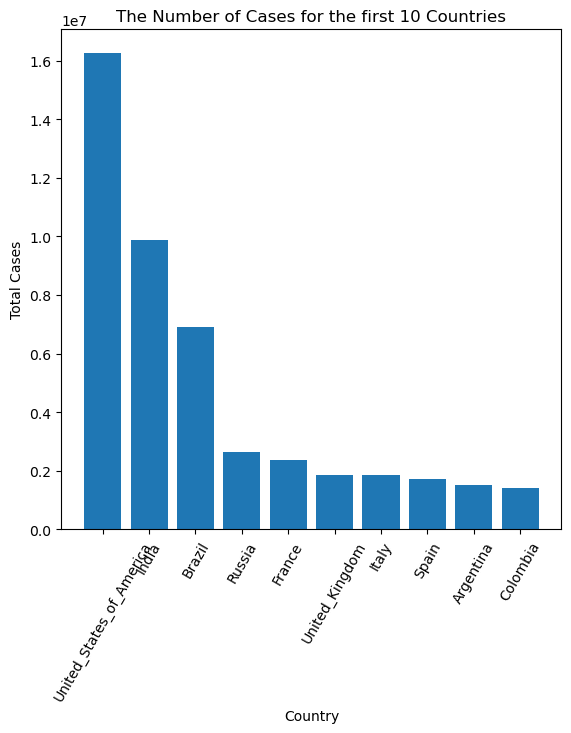

In [75]:
x = deaths_by_country_sum.index.tolist()

y = deaths_by_country_sum

fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0.1, 0.1, 1, 1])

ax.set_xlabel('Country')
ax.set_ylabel('Total Cases')
ax.set_title('The Number of Cases for the first 10 Countries')
ax.set_xticklabels(x, rotation=60, horizontalalignment='center')  # corrected horizontalalignment parameter

ax.bar(x, y)
plt.show()

In [77]:
def time_series_by_country(country):
    corona_by_day_ser = corona[corona['Countries'] == country].sort_values(by=['year', 'month', 'day']).reset_index(drop=True)
    
    x = corona_by_day_ser.index
    y = corona_by_day_ser[['deaths', 'cases']]
    
    max_deaths_v = y['deaths'].max()
    max_deaths_i = corona_by_day_ser['deaths'].idxmax()
    
    max_cases_v = y['cases'].max()
    max_cases_i = corona_by_day_ser['cases'].idxmax()
    
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.1, 1, 1])
    
    ax.set_xlabel('Days')
    ax.set_ylabel('Total of Deaths & Cases')
    ax.set_title('Sum of global deaths & cases over time')
    ax.set_xticklabels(' ')
    
    ax.annotate('Max Deaths\n{} deaths'.format(max_deaths_v), xy=(max_deaths_i, max_deaths_v), xytext=(max_deaths_i + 5, max_deaths_v + 50),
                arrowprops=dict(facecolor='red'))
    
    ax.annotate('Max Cases\n{} cases'.format(max_cases_v), xy=(max_cases_i, max_cases_v), xytext=(max_cases_i + 5, max_cases_v + 50),
                arrowprops=dict(facecolor='red'))
        
    ax.plot(x, y)
    plt.show()

C:\Users\mohbc\AppData\Local\Temp\ipykernel_6408\88474361.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(' ')


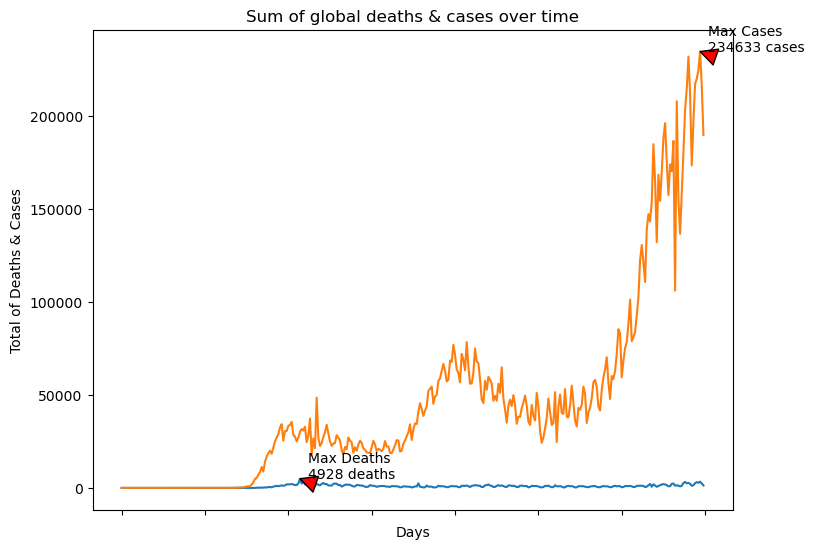

In [81]:
time_series_by_country('United_States_of_America')